In [4]:
from itertools import product

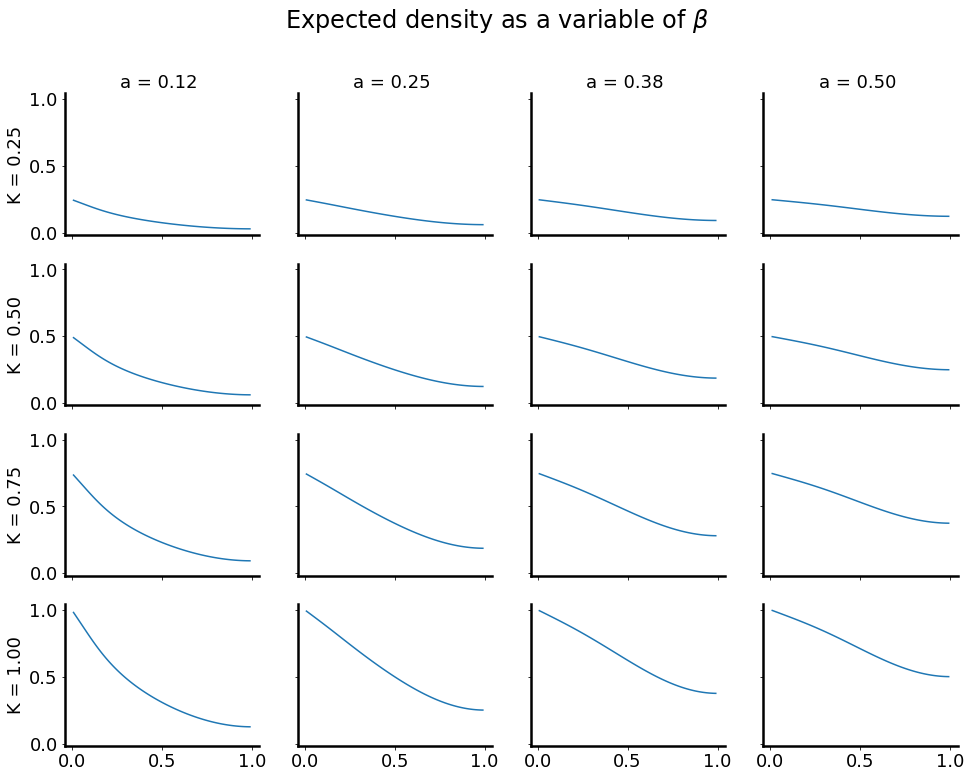

In [25]:
n_figures = 4

alphas = np.linspace(0.5/n_figures, 0.5, n_figures)
Ks = np.linspace(1/n_figures, 1, n_figures)

betas = np.linspace(0.01, 0.99, 99)
rates  = np.tan(np.pi * (1-betas) / 2)

fig, axes = plt.subplots(n_figures, n_figures, figsize = (16,12), sharex=True, sharey=True)

fig.suptitle(fr'Expected density as a variable of $\beta$', fontsize=24)
for i,j in product(range(n_figures), repeat = 2):
    ax = axes[i,j]
    if j == 0:
        ax.set_ylabel(f"K = {Ks[i]:.2f}", fontsize = 18)
    if j == 4:
        ax.set_ylabel(f"K = {Ks[i]:.2f}", fontsize = 18)
        ax.yaxis.set_label_position("right")
    if i == 0:
        ax.set_title(f"a = {alphas[j]:.2f} ", fontsize = 18)
    
    rhos = rng.classes.network_model.interaction_strength_to_density(K=Ks[i], a=alphas[j], rate=rates)
    ax.plot(betas, rhos)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    rng.ax_setup(ax)
    ax.tick_params(axis='both', which='major', labelsize=18)

In [26]:
def rho_to_K(rho, a, rate):
    try:
        return rng.classes.network_model.density_to_interaction_strength(rho=rho, a=a, rate=rate)
    except ValueError:
        return np.nan

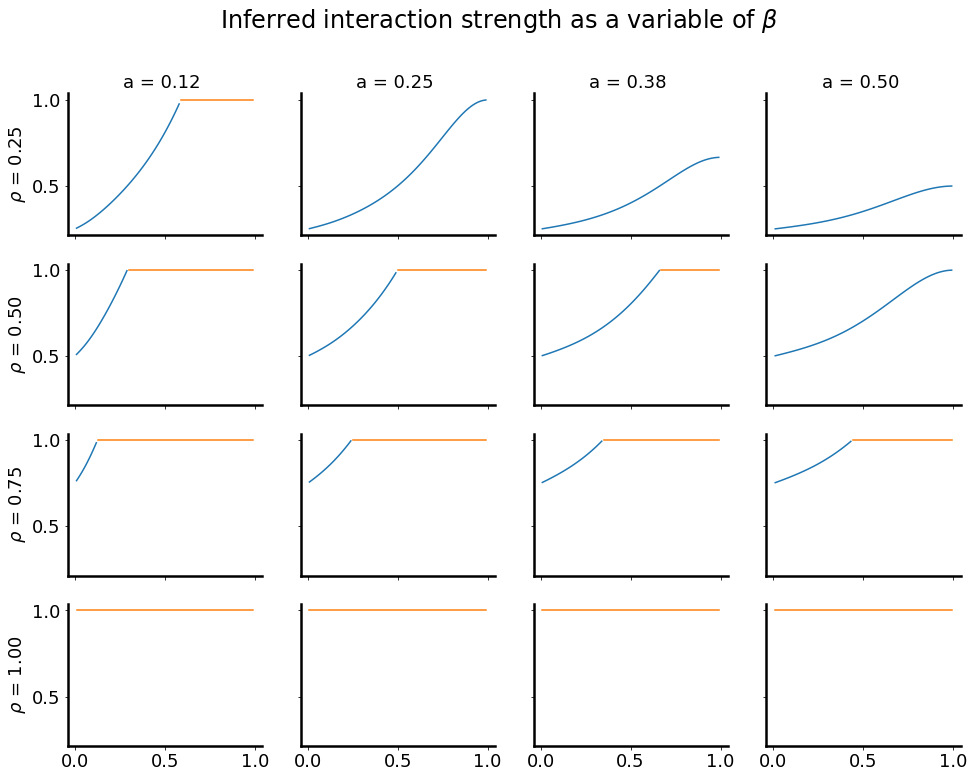

In [35]:
n_figures = 4

alphas = np.linspace(0.5/n_figures, 0.5, n_figures)
rhos = np.linspace(1/n_figures, 1, n_figures)

betas = np.linspace(0.01, 0.99, 99)
rates  = np.tan(np.pi * (1-betas) / 2)

fig, axes = plt.subplots(n_figures, n_figures, figsize = (16,12), sharex=True, sharey=True)

fig.suptitle(fr'Inferred interaction strength as a variable of $\beta$', fontsize=24)
for i,j in product(range(n_figures), repeat = 2):
    ax = axes[i,j]
    if j == 0:
        ax.set_ylabel(fr"$\rho$ = {rhos[i]:.2f}", fontsize = 18)
    if j == 4:
        ax.set_ylabel(fr"$\rho$ = {rhos[i]:.2f}", fontsize = 18)
        ax.yaxis.set_label_position("right")
    if i == 0:
        ax.set_title(f"a = {alphas[j]:.2f} ", fontsize = 18)
    
    Ks = [rho_to_K(rho=rhos[i], a=alphas[j], rate=rate) for rate in rates]
    ax.plot(betas, Ks)
    ax.plot(betas[np.isnan(Ks)], [1]*len(betas[np.isnan(Ks)]))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    rng.ax_setup(ax)
    ax.tick_params(axis='both', which='major', labelsize=18)

### Discontinous jump at $\beta = 0$ (lack of phase transition)

The network becomes "ringy" with probability
$$p_{\text{ring}} = 1 - \left( 1 - \frac{K}{\alpha \lambda'} \cdot \frac{1 - e^{\alpha \lambda'} + \alpha\lambda'}{1 - e^{\lambda'}} \right)^N \,$$
with $\lambda' = 2\pi\lambda$.

A quick calculation shows that
$$T(\lambda') = K \left(\frac{1}{\alpha x} \cdot \frac{1 - e^{\alpha x} + \alpha \lambda'}{1 - e^{\lambda'}} \right)
\xrightarrow{\lambda' \rightarrow 0} \frac{K\alpha}{2} > 0 \, $$

and hence, for any constant $K$ and $\alpha$ the probability of the network forming a ring approaches $1$ as $N \rightarrow \infty$ and $\beta \rightarrow 1$.

Conversely, we have

$$T(x) \xrightarrow{x \rightarrow \infty} 0 \, $$
and hence the nework does not form a ring for $\beta \rightarrow 0$. 

The term $T(x)$ is positive for $x < \infty$ and hence the network will eventually become circular.

# Parameter exploration

In [7]:
import scipy
import ringity as rng
import networkx as nx

from itertools import product
from collections import defaultdict
from scipy.spatial.distance import pdist, squareform
from ringity.classes.network_model import NetworkBuilder

In [8]:
N = 2**8

In [9]:
n_ensemble = 2**6

alphas = np.linspace(0.5/5, 0.5, 5)
betas = np.linspace(0.01, 0.99, 5)
Ks = np.linspace(1/5, 1, 5)

rates  = np.tan(np.pi * (1-betas) / 2)

In [10]:
clustering = defaultdict(list)
network = dict()
positions = dict()

for i,j,k in product(range(5), repeat = 3):
    G, pos = rng.classes.network_model.network_model(N = N, K = Ks[i], a = alphas[j], rate = rates[k], return_positions = True)
    network[(i,j,k)] = G
    positions[(i,j,k)] = list(zip(np.cos(pos), np.sin(pos)))
    clustering[(i,j,k)].append(rng.graphlet_coefficients.triangle_signature(G)[0])

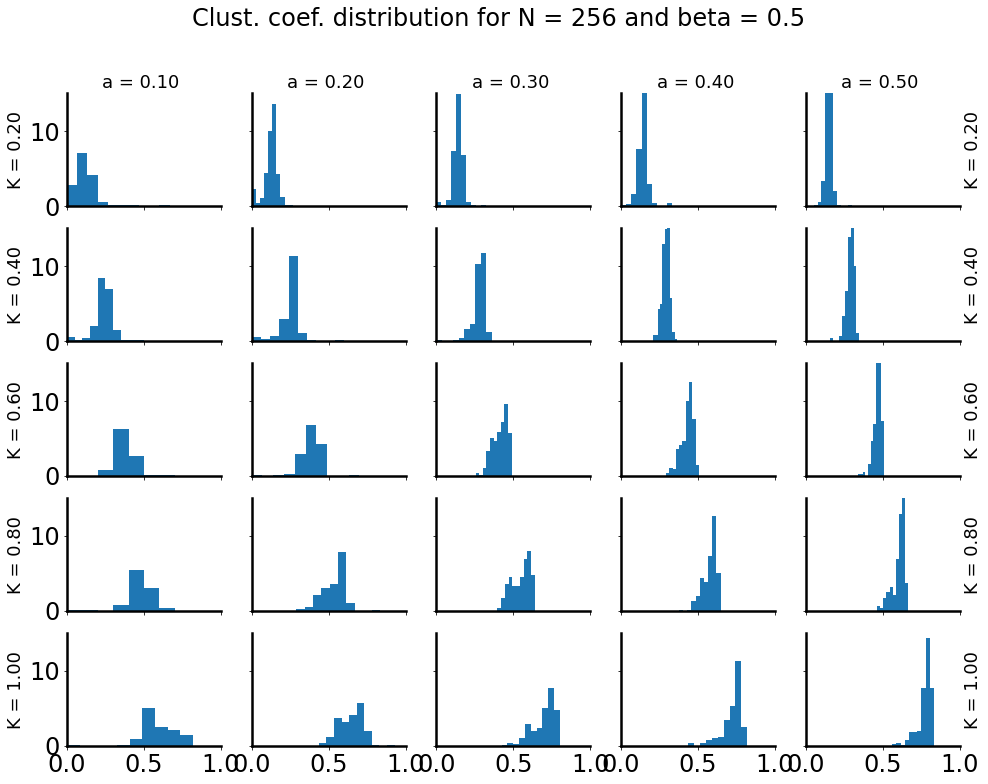

In [11]:
k = 2

fig, axes = plt.subplots(5, 5, figsize = (16,12), sharex=True, sharey=True)

fig.suptitle(f'Clust. coef. distribution for N = {N} and beta = {betas[k]}', fontsize=24)
for i,j in product(range(5), repeat = 2):
    ax = axes[i,j]
    if j == 0:
        ax.set_ylabel(f"K = {Ks[i]:.2f}", fontsize = 18)
    if j == 4:
        ax.set_ylabel(f"K = {Ks[i]:.2f}", fontsize = 18)
        ax.yaxis.set_label_position("right")
    if i == 0:
        ax.set_title(f"a = {alphas[j]:.2f} ", fontsize = 18)
    ax.hist(clustering[(i,j,k)], density = True, bins = 10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0,15)
    ax.set_xlim(0,1)
    rng.ax_setup(ax)

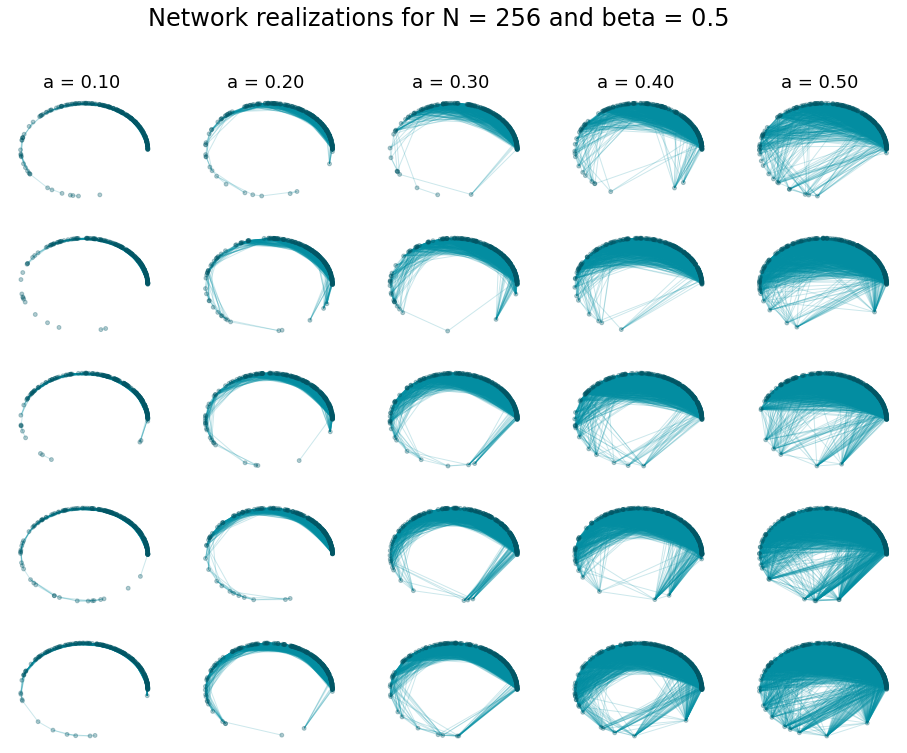

In [12]:
k = 2

fig, axes = plt.subplots(5, 5, figsize = (16,12), sharex=True, sharey=True)

fig.suptitle(f'Network realizations for N = {N} and beta = {betas[k]}', fontsize=24)
for i,j in product(range(5), repeat = 2):
    ax = axes[i,j]
    rng.plot_nx(network[(i,j,k)], pos = positions[(i,j,k)], ax=ax)
    if j == 0:
        ax.set_ylabel(f"K = {Ks[i]:.2f}", fontsize = 18)
    if j == 4:
        ax.set_ylabel(f"K = {Ks[i]:.2f}", fontsize = 18)
        ax.yaxis.set_label_position("right")
    if i == 0:
        ax.set_title(f"a = {alphas[j]:.2f} ", fontsize = 18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    rng.ax_setup(ax)

---

# Walking guide

First we initialize a random drawing of the positions on the circle.

In [13]:
import time
import numpy as np
import pandas as pd
import ringity as rng
import networkx as nx
import scipy.stats as ss
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist, squareform
from ringity.classes.network_model import NetworkBuilder

In [35]:
# Pipeline

N = 2**12
beta = 0.65
alpha = 0.4
rho = 0.134

rate  = np.tan(np.pi * (1-beta) / 2)
delay = 2/np.pi * np.arctan(rate)
K = rng.classes.network_model.density_to_interaction_strength(rho, rate, alpha)

network_builder = NetworkBuilder(random_state = 1234)
network_builder.set_distribution('exponential', scale = 1/rate)
network_builder.instantiate_positions(N)
network_builder.calculate_distances(metric = 'euclidean', circular = True)
network_builder.calculate_similarities(alpha = alpha, sim_func = 'box_cosine')
network_builder.calculate_probabilities(a = K, b = 0)
network_builder.instantiate_network()

G = nx.from_numpy_array(squareform(network_builder.network))

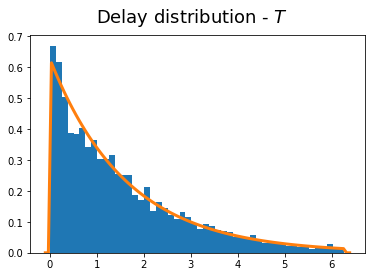

In [36]:
x = np.linspace(-0.1,2*np.pi+0.1,100)

plt.hist(network_builder.positions, density=True, bins=50);
plt.plot(x, rng.pdf_delay(x, rate, 'rate') , linewidth=3)

plt.suptitle("Delay distribution - $T$", fontsize=18);

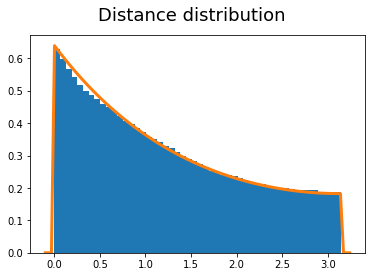

In [37]:
x = np.linspace(-0.1, np.pi+0.1, 100)

plt.hist(network_builder._distances, density=True, bins=50);
plt.plot(x, rng.pdf_circular_distance(x, rate, 'rate') , linewidth=3)

plt.suptitle("Distance distribution", fontsize=18);

In [38]:
disc_part = 2*sum((network_builder._similarities!=0)) / (N*(N-1))

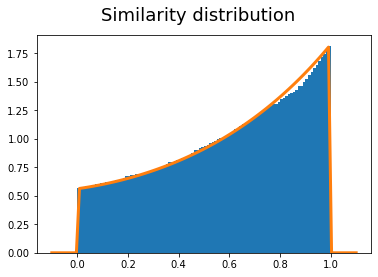

In [40]:
x = np.linspace(-0.1, 1.1, 100)

plt.hist(network_builder._similarities[network_builder._similarities!=0], density=True, bins=100);
plt.plot(x, rng.pdf_similarity(x, parameter = rate, a = alpha, parameter_type = 'rate')/disc_part , linewidth=3)

plt.suptitle("Similarity distribution", fontsize=18);

In [41]:
np.mean(network_builder._similarities)

0.5249862092419691

In [42]:
rng.classes.network_model.mean_similarity(a=alpha, rate = rate)

0.5305214636958808

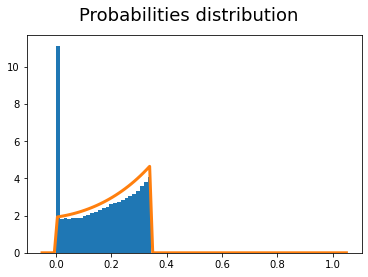

In [20]:
x = np.linspace(-0.05, 1.05, 100)

plt.hist(network_builder.probabilities, density=True, bins=25);
plt.plot(x, rng.pdf_probability(x, 
                                rho = rho,
                                parameter = rate, 
                                a = alpha, 
                                parameter_type = 'rate')/disc_part , linewidth=3)

plt.suptitle("Probabilities distribution", fontsize=18);

## Parameter scouting

In [91]:
N = 2**9
beta = 0.7
alpha = 0.05
K = 1
# rho = 0.025

rate  = np.tan(np.pi * (1-beta) / 2)
delay = 2/np.pi * np.arctan(rate)
# K = rng.classes.network_model.slope(rho, rate, alpha)


network_builder = NetworkBuilder()
network_builder.set_distribution('exponential', scale = 1/rate)
network_builder.instantiate_positions(N)
network_builder.calculate_distances(metric = 'euclidean', circular = True)
network_builder.calculate_similarities(alpha = alpha, sim_func = 'box_cosine')
network_builder.calculate_probabilities(a = K, b = 0)
network_builder.instantiate_network()

In [92]:
G = nx.from_numpy_array(squareform(network_builder.network))

pos = list(zip(np.cos(network_builder.positions), 
               np.sin(network_builder.positions)))

0.26413220931910275


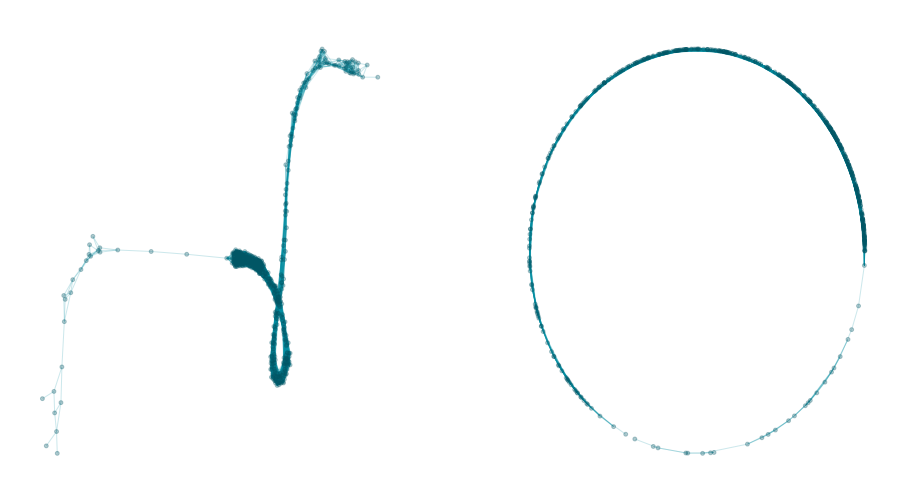

In [93]:
print(rng.diagram(G)[:50].ring_score)

fig, axes = plt.subplots(1, 2, figsize = (16,9))

rng.plot_nx(G, ax=axes[0])
rng.plot_nx(G, ax=axes[1], pos = pos)

In [ ]:
pos = nx.spring_layout(G)

In [104]:
alphas = np.linspace(0.5/4, 0.5, 4)
Ks = np.linspace(1/4, 1, 4)

In [105]:
N = 2**9
beta = 0.7

rate  = np.tan(np.pi * (1-beta) / 2)

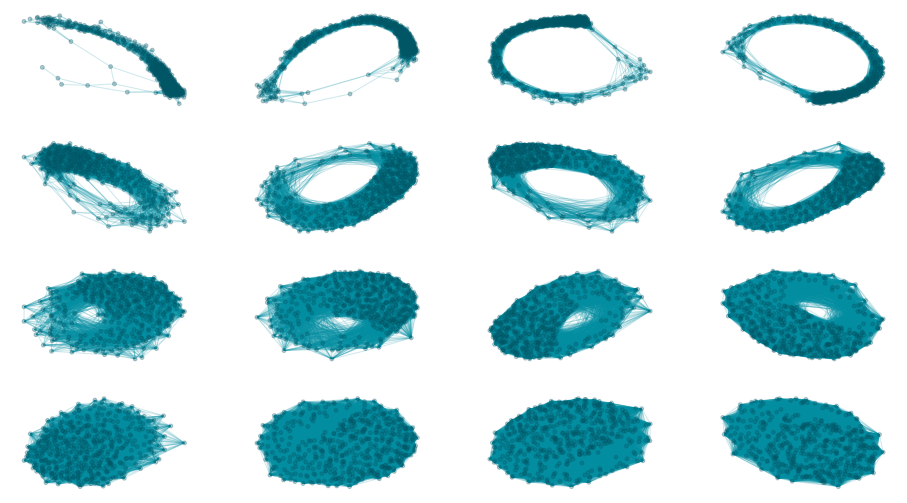

In [106]:
fig, axes = plt.subplots(4, 4, figsize = (16,9))

for i,j in product(range(4), repeat = 2):
    network_builder = NetworkBuilder()
    network_builder.set_distribution('exponential', scale = 1/rate)
    network_builder.instantiate_positions(N)
    network_builder.calculate_distances(metric = 'euclidean', circular = True)
    network_builder.calculate_similarities(alpha = alphas[i], sim_func = 'box_cosine')
    network_builder.calculate_probabilities(a = Ks[j], b = 0)
    network_builder.instantiate_network()
    
    G = nx.from_numpy_array(squareform(network_builder.network))

    pos = list(zip(np.cos(network_builder.positions), 
                   np.sin(network_builder.positions)))
    
    rng.plot_nx(G, ax=axes[i,j])

In [107]:
alphas

array([0.125, 0.25 , 0.375, 0.5  ])

In [109]:
Ks

array([0.25, 0.5 , 0.75, 1.  ])

In [110]:
beta

0.7

## Phase transition

In [ ]:
# Pipeline

N = 2**8
alpha = 0.5
K = 0.1

n_ensembl = 2**6
ring_scores = dict()
beta_arr = np.linspace(0.01, 0.99, 2**5)

t1 = time.time()
for nr, beta in enumerate(beta_arr, 1):
    t2 = time.time()
    percentage_finished = nr/len(beta_arr)
    time_passed = t2-t1
    eta = time_passed*(1/percentage_finished - 1)
    print(f"{100*percentage_finished:.2f}% - time passed: {time_passed:.2f}sec - eta: {eta:.2f}", end = '\r')
    
    ring_scores[beta] = list()
    
    for _ in range(n_ensembl):
        rate  = np.tan(np.pi * (1-beta) / 2)

        network_builder = NetworkBuilder()
        network_builder.set_distribution('exponential', scale = 1/rate)
        network_builder.instantiate_positions(N)
        network_builder.calculate_distances(metric = 'euclidean', circular = True)
        network_builder.calculate_similarities(alpha = alpha, sim_func = 'box_cosine')
        network_builder.calculate_probabilities(a = K, b = 0)
        network_builder.instantiate_network()

        G = nx.from_numpy_array(squareform(network_builder.network))
        S = nx.subgraph(G, max(nx.connected_components(G), key=len))
        if len(S) < N:
            print('o')
            print()
        
        ring_scores[beta].append(rng.diagram(S)[:50].ring_score)
        #ring_scores[beta].append(nx.diameter(S))

In [51]:
ring_score_df = pd.DataFrame(ring_scores)

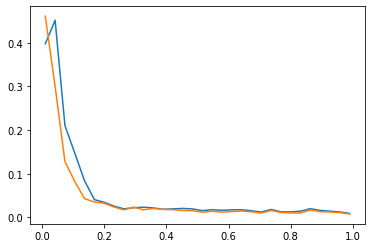

In [52]:
# N = 2**10
# K = 0.1
plt.plot(ring_score_df.columns, ring_score_df.mean())
plt.plot(ring_score_df.columns, ring_score_df.median())

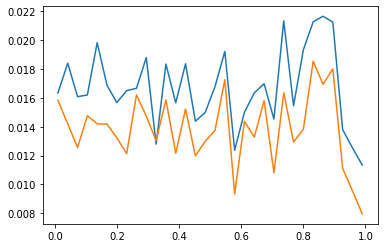

In [41]:
# N = 2**9
# K = 0.1
plt.plot(ring_score_df.columns, ring_score_df.mean())
plt.plot(ring_score_df.columns, ring_score_df.median())

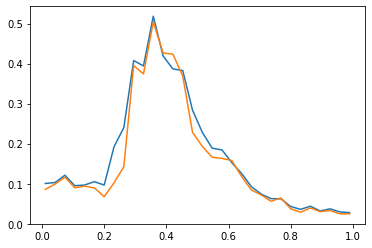

In [31]:
# N = 2**9
# K = 0.2
plt.plot(ring_score_df.columns, ring_score_df.mean())
plt.plot(ring_score_df.columns, ring_score_df.median())

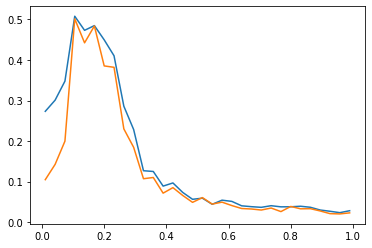

In [27]:
# N = 2**8
# K = 0.2
plt.plot(ring_score_df.columns, ring_score_df.mean())
plt.plot(ring_score_df.columns, ring_score_df.median())

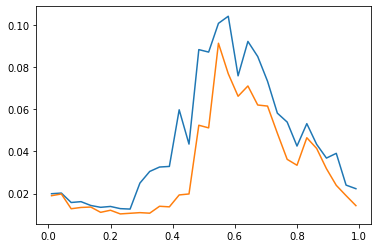

In [45]:
# N = 2**8
# K = 0.1

plt.plot(ring_score_df.columns, ring_score_df.mean())
plt.plot(ring_score_df.columns, ring_score_df.median())

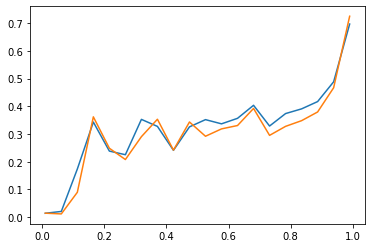

In [34]:
plt.plot(ring_score_df.columns, ring_score_df.mean())
plt.plot(ring_score_df.columns, ring_score_df.median())

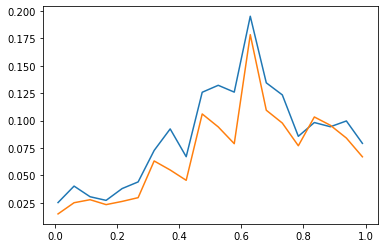

In [25]:
plt.plot(ring_score_df.columns, ring_score_df.mean())
plt.plot(ring_score_df.columns, ring_score_df.median())

In [10]:
nx.density(G)

0.0505442759295499

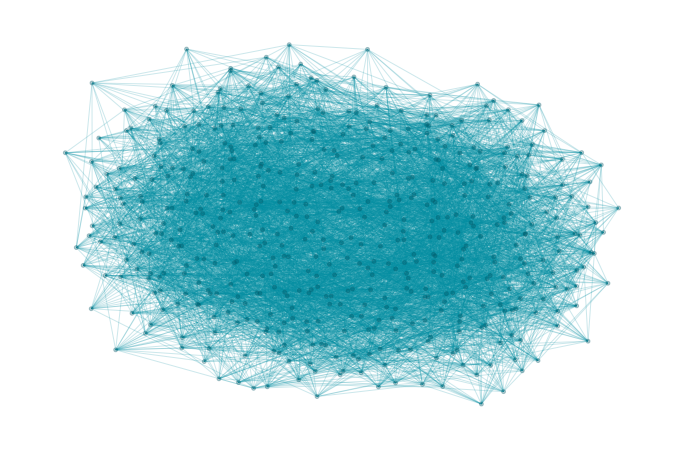

In [9]:
rng.plot_nx(G)

---

# Theory expansion

## As a statistical interaction network model

Fixed parameters of the model are:
 - an _internal state spce / response space / local microstates_, $\sigma_{\mathit int} = \{ 0, 1\}$
 - an _external state space_, $\sigma_{\mathit ext} = [ 0, 2\pi]$
 - position distribution of elements / components / statistical units, $X_i \sim WExp(\lambda)$
 - a connection function, 
$p:\sigma_{\mathit ext} \times \sigma_{\mathit ext} \rightarrow [0,1]: (\theta_i, \theta_j) \mapsto \min \Big\{1, k - \frac{k}{2\pi a}d(\theta_i, \theta_j) \Big\}$,

where $d(.,.)$ is the "_periodic distance_", i.e. $d(\theta_i, \theta_j) = \min {\Big\{ \big|\theta_i-\theta_j\big|, 2\pi-\big|\theta_i-\theta_j\big|} \Big\}$

## As an Ising model with a "_random lattice_"

---
**Pending Thoughts**

I think the Ising model makes more sense for the "line graph", i.e. where the edges represent components and nodes define interactions.

---

Given the three parameters $N$, $a$ and $\beta$ we can construct a "_random lattice_" $\Lambda$ via:
$$\langle ij \rangle \Leftrightarrow d(\Theta_i, \Theta_j) < 2\pi a \, , \text{where } \Theta_k \sim \mathit WExp (\lambda)$$

## As a Generalized random geometric graph (RGG)

The connection fucntion is taken from the "_Quasi unit disk model_" via
$$H(d) =
    \begin{cases}
      1, & \text{if}\ d \leq d_- \\
      \frac{d_+ - d}{d_+ - d_-}, & \text{if}\ d_- \leq d \leq d_+ \\
      0, & \text{if}\ d \geq d_+
    \end{cases} \, ,$$ 
    
where $d_- = 2\pi a (1-1/k)$ and $d_+ = 2$. 

The small $d$ expansion is the constant $1$ (similar to a random geometric graph model with a "hard" cutoff).

## References
- Dettmann, Carl P., and Orestis Georgiou. "Random geometric graphs with general connection functions." Physical Review E 93.3 (2016): 032313.
- Kuhn, F., R. Wattenhofer, and A. Zollinger. "Proceedings of the 2003 Joint Workshop on Foundations of Mobile Computing." (2003): 69-78.
- Gao, Deyun, et al. "Hop-distance relationship analysis with quasi-UDG model for node localization in wireless sensor networks." EURASIP Journal on Wireless Communications and Networking 2011.1 (2011): 1-11